In [1]:
from datetime import datetime
print('Results last refreshed on ' + datetime.now().isoformat())

Results last refreshed on 2020-07-28T15:32:56.631697


In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
flat = spark.sql('select * from awight.template_survey_flat_answers')

In [12]:
def plot_votes(group_no, responses):
  ax = flat \
    .where(flat['group_no'] == group_no) \
    .toPandas()['answer'] \
    .value_counts() \
    .sort_index() \
    .plot.bar(figsize=(12,4))
  ax.set_xlabel('Prototype ' + str(group_no))
  ax.set_ylabel('Votes')
  ax.plot()

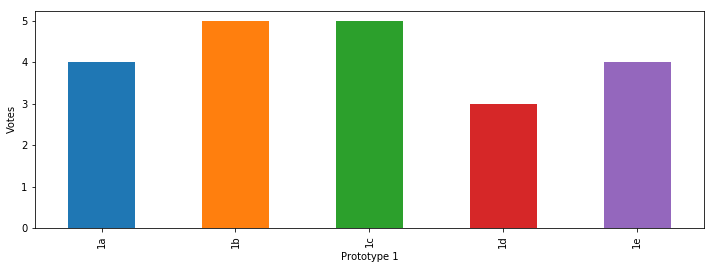

In [13]:
plot_votes(1, flat)

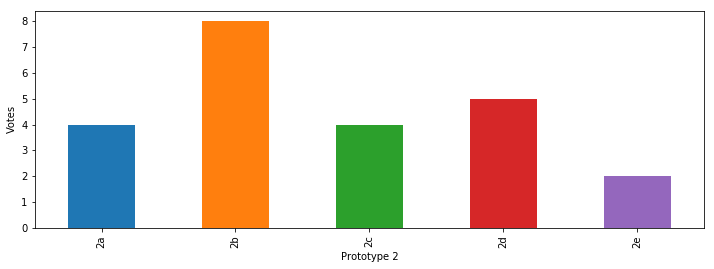

In [14]:
plot_votes(2, flat)

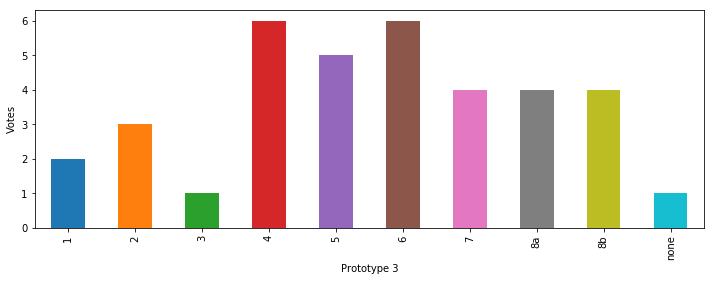

In [15]:
plot_votes(3, flat)

In [16]:
responses = spark.sql('select * from awight.template_survey_responses')

[]

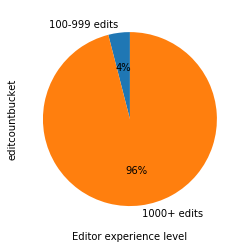

In [17]:
ax = responses \
    .toPandas()['editcountbucket'] \
    .value_counts() \
    .sort_index() \
    .plot.pie(figsize=(12,4), startangle=90, autopct='%1.0f%%')
ax.set_xlabel('Editor experience level')
ax.plot()